# **IPPR Expt 2: Histogram Equalization**

Name: Shwetha Iyer

PRN: 1032211195

Performed on: 1/2/24

Submitted on: 3/2/24

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# **Histogram Equalization of Grayscale Image**

In [ ]:
img = cv2.imread("/content/portrait.png")
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [ ]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
eq_img = cv2.equalizeHist(img)
eq_hist = cv2.calcHist([eq_img],[0],None,[256],[0,256])

Text(0.5, 1.0, 'Equalized Histogram')

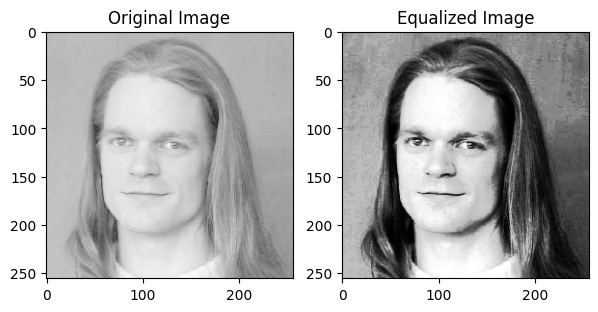

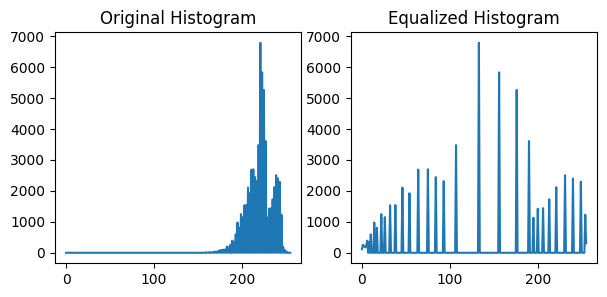

In [ ]:
f, ax = plt.subplots(1,2,figsize=(7,7))
ax[0].imshow(img,cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(eq_img,cmap='gray')
ax[1].set_title("Equalized Image")

f, ax = plt.subplots(1,2,figsize=(7,3))
ax[0].plot(hist)
ax[0].set_title("Original Histogram")
ax[1].plot(eq_hist)
ax[1].set_title("Equalized Histogram")

# **Local Histogram Equalization of Grayscale Image**

Text(0.5, 1.0, 'Mask')

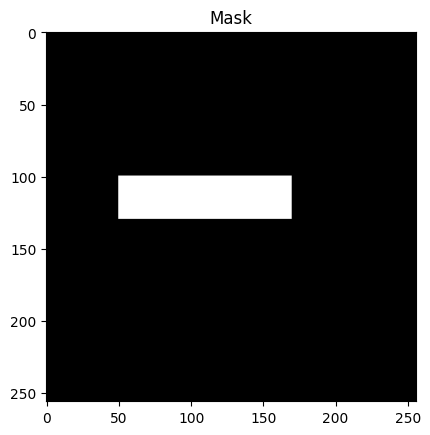

In [ ]:
mask = np.zeros(img.shape, dtype="uint8")
mask[100:130, 50:170] = 255
plt.imshow(mask,cmap='gray')
plt.title("Mask")

In [ ]:
eq_img = img.copy()
eq_img[100:130, 50:170] = cv2.equalizeHist(eq_img[100:130, 50:170])
hist = cv2.calcHist([img], [0], mask, [256], [0, 256])
eq_hist = cv2.calcHist([eq_img], [0], mask, [256], [0, 256])

Text(0.5, 1.0, 'Equalized Histogram')

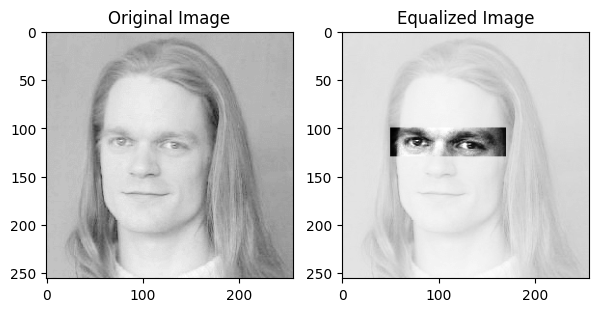

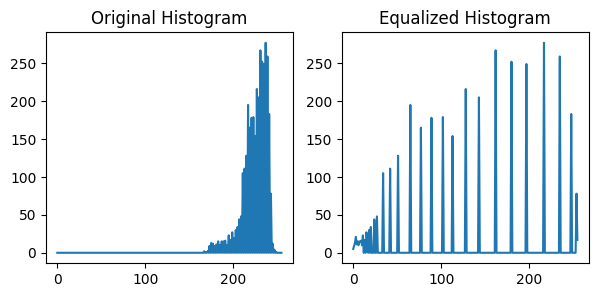

In [ ]:
f, ax = plt.subplots(1,2,figsize=(7,7))
ax[0].imshow(img,cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(eq_img,cmap='gray')
ax[1].set_title("Equalized Image")

f, ax = plt.subplots(1,2,figsize=(7,3))
ax[0].plot(hist)
ax[0].set_title("Original Histogram")
ax[1].plot(eq_hist)
ax[1].set_title("Equalized Histogram")

# **Histogram Equalization of Color Image**

In [ ]:
img1 = cv2.imread("/content/mandrill_condec.jpg")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

In [ ]:
r_img, g_img, b_img = cv2.split(img1)
r_eq = cv2.equalizeHist(r_img)
g_eq = cv2.equalizeHist(g_img)
b_eq = cv2.equalizeHist(b_img)

eq_img1 = cv2.merge((r_eq, g_eq, b_eq))

Text(0.5, 1.0, 'Equalized Image')

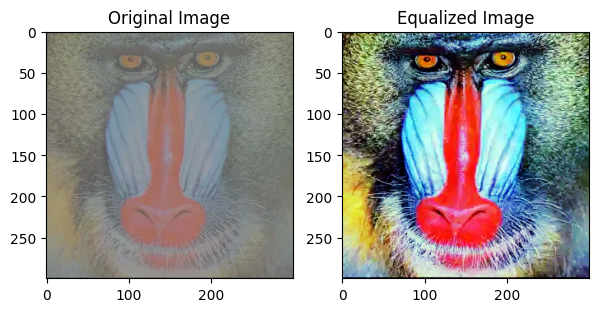

In [ ]:
f, ax = plt.subplots(1,2,figsize=(7,7))
ax[0].imshow(img1)
ax[0].set_title("Original Image")
ax[1].imshow(eq_img1)
ax[1].set_title("Equalized Image")

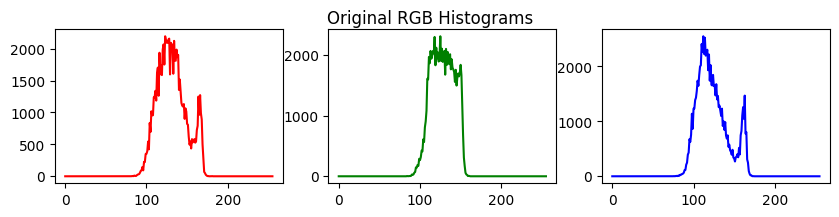

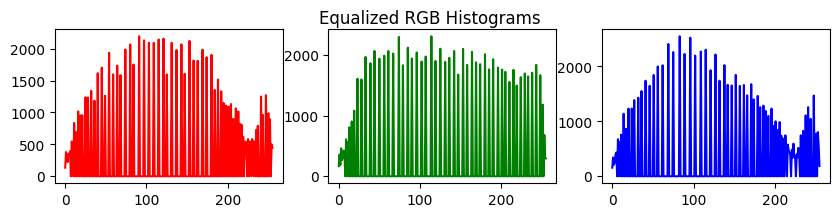

In [ ]:
color = ('r','g','b')

f, ax = plt.subplots(1,3,figsize=(10,2))
f.suptitle('Original RGB Histograms')
for i,col in enumerate(color):
    hist = cv2.calcHist([img1[:,:,i]],[0],None,[256],[0,256])
    ax[i].plot(hist,color = col)

f, ax = plt.subplots(1,3,figsize=(10,2))
f.suptitle('Equalized RGB Histograms')
for i,col in enumerate(color):
    eq_hist = cv2.calcHist([eq_img1[:,:,i]],[0],None,[256],[0,256])
    ax[i].plot(eq_hist,color = col)

# **Local Histogram Equalization of Color Image**

Text(0.5, 1.0, 'Mask')

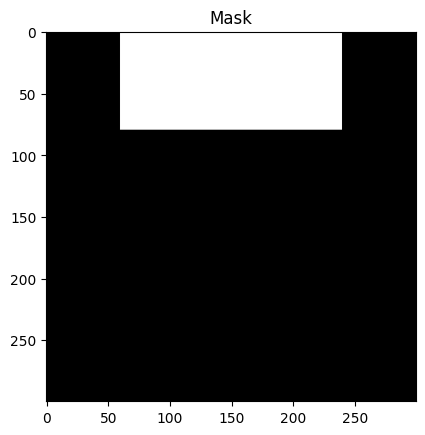

In [ ]:
mask = np.zeros(img1.shape[:2], dtype="uint8")
mask[0:80, 60:240] = 255
plt.imshow(mask,cmap='gray')
plt.title("Mask")

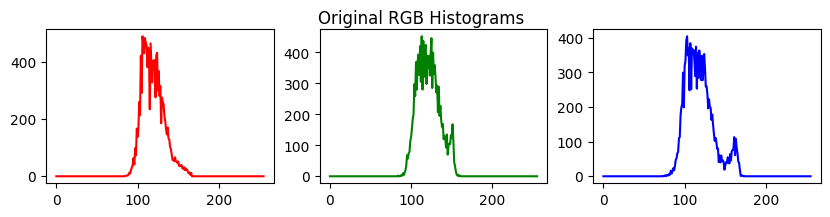

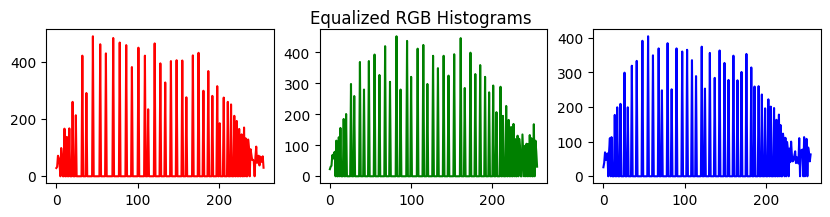

In [ ]:
eq_img1 = img1.copy()
for i in range(3):
    eq_img1[0:80, 60:240, i] = cv2.equalizeHist(eq_img1[0:80, 60:240, i])
eq_img1 = eq_img1.astype(np.uint8)

color = ('r','g','b')
f, ax = plt.subplots(1,3,figsize=(10,2))
f.suptitle('Original RGB Histograms')
for i,col in enumerate(color):
    hist = cv2.calcHist([img1[:,:,i]],[0],mask,[256],[0,256])
    ax[i].plot(hist,color = col)

f, ax = plt.subplots(1,3,figsize=(10,2))
f.suptitle('Equalized RGB Histograms')
for i,col in enumerate(color):
    eq_hist = cv2.calcHist([eq_img1[:,:,i]],[0],mask,[256],[0,256])
    ax[i].plot(eq_hist,color = col)

Text(0.5, 1.0, 'Equalized Image')

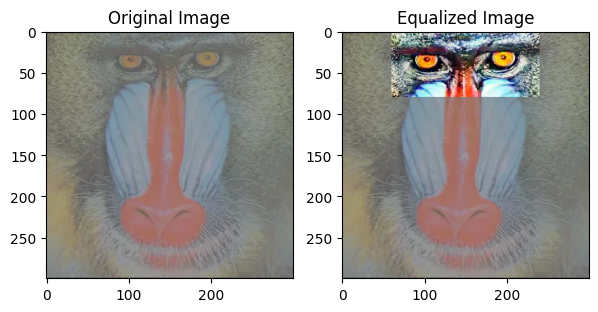

In [ ]:
f, ax = plt.subplots(1,2,figsize=(7,7))
ax[0].imshow(img1,cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(eq_img1,cmap='gray')
ax[1].set_title("Equalized Image")

# **Histogram Equalization of V-channel of HSV Image**

Text(0.5, 1.0, 'HSV Image')

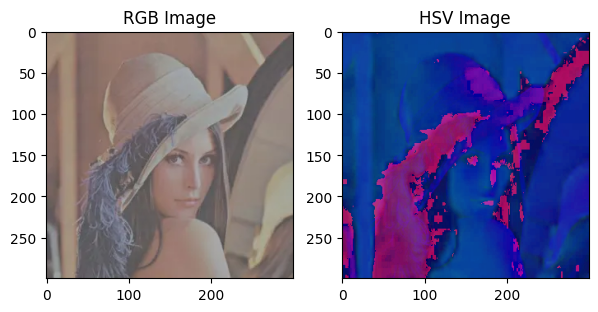

In [ ]:
img2 = cv2.imread("/content/lena_condec.jpg")
img_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

f, ax = plt.subplots(1,2,figsize=(7,7))
ax[0].imshow(img_rgb)
ax[0].set_title("RGB Image")
ax[1].imshow(img_hsv)
ax[1].set_title("HSV Image")

In [ ]:
# equalize the V-channel corresponding to brightness
img_hsv[:, :, 2] = cv2.equalizeHist(img_hsv[:, :, 2])
eq_img = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
hist = cv2.calcHist([img_hsv], [0], None, [256], [0,256])
eq_hist = cv2.calcHist([eq_img], [0], None, [256], [0, 256])

Text(0.5, 1.0, 'Equalized V Histogram')

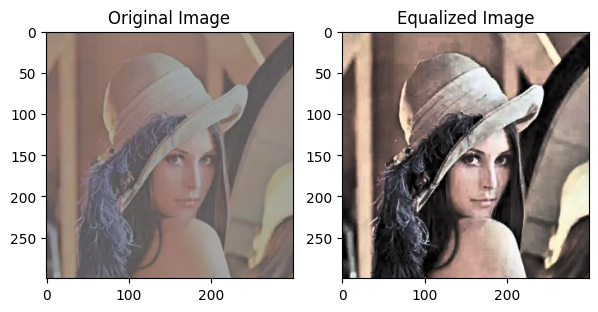

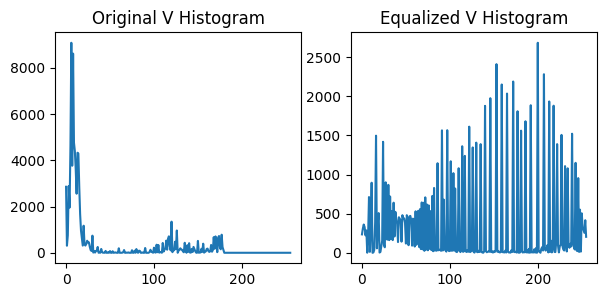

In [ ]:
f, ax = plt.subplots(1,2,figsize=(7,7))
ax[0].imshow(img_rgb,cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(eq_img,cmap='gray')
ax[1].set_title("Equalized Image")

f, ax = plt.subplots(1,2,figsize=(7,3))
ax[0].plot(hist)
ax[0].set_title("Original V Histogram")
ax[1].plot(eq_hist)
ax[1].set_title("Equalized V Histogram")

# **Results and Conclusion**
*Histogram equalization* is the process of spreading out the intensity range of the image in order to improve the contrast of image. The experiment aimed to enhance image contrast globally and locally using histogram equalization. OpenCV functions like calcHist() and equalizeHist() were used for computing the histograms and equalizing them. The equalized images were characterized by a wider distribution of pixel intensities.

# **Post Lab Questions**

**1. A bright image will have what kind of histogram?**

The histogram of a bright image will have most of its components on the high side of the gray scale (right side of graph).

**2. What is 'Dynamic range' and 'Contrast' of digital images?**

The Dynamic Range of a camera sensor is the ratio/difference between the brightest and darkest signal that can be captured in a single image. The dynamic range conveys the maximum variation in light intensity that the sensor can record.

Contrast is the ratio of the luminance of the brightest color (white) to that of the darkest color (black) that the system is capable of producing. A high-contrast image has both dark shadows and bright highlights.


**An image with dynamic range 0 to 7 is given below (3 bit). Perform the following on the image.**

**a) Determine the histogram of the Image.**

**b) What is the effect on histogram if MSB of every pixel is made 1.**

Text(0.5, 1.0, 'Histogram with MSB=1')

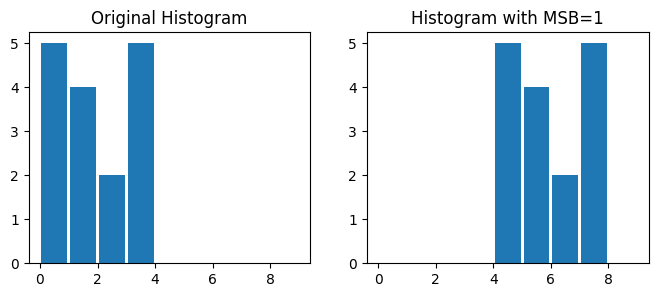

In [ ]:
# Range = 0-7
I = np.array([[2, 2, 3, 0],
              [0, 0, 0, 0],
              [1, 1, 3, 3],
              [1, 1, 3, 3]])

f, ax = plt.subplots(1,2,figsize=(8,3))

# a. Histogram of Image
vals = I.flatten()
ax[0].hist(vals, bins=np.arange(10), rwidth=0.9)
ax[0].set_title("Original Histogram")


# b. Histogram if MSB of every pixel is made to 1
I_new = I | 0b100
vals = I_new.flatten()
ax[1].hist(vals, bins=np.arange(10), rwidth=0.9)
ax[1].set_title("Histogram with MSB=1")